In [10]:
file1 = "../remote/Silicon_etch.off"
# file2 = "../remote/Silicon_etch.off"
# file1 = "../remote/Nitride_etch.obj"
file2 = "../initial_struct_600_600.off"

In [11]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_mesh(file_path):
    mesh = trimesh.load(file_path, force='mesh')
    if not isinstance(mesh, trimesh.Trimesh):
        raise TypeError("Loaded file is not a valid mesh.")
    return mesh

def slice_mesh(mesh, y_level):
    # Define a plane origin and normal for slicing along Y
    plane_origin = np.array([0.0, y_level, 0.0])
    plane_normal = np.array([0.0, 1.0, 0.0])

    # Perform slice
    slice_section = mesh.section(plane_origin=plane_origin, plane_normal=plane_normal)
    if slice_section is None:
        print("No intersection at y =", y_level)
        return None

    # Convert to 2D path
    slice_2D, to_3D = slice_section.to_planar()
    return slice_2D

def plot_slice(ax, slice_2D, colr, label):
    for entity in slice_2D.entities:
        points = entity.discrete(slice_2D.vertices)
        points = np.array(points)
        ax.plot(points[:, 0], points[:, 1], colr, alpha = 0.5, linewidth=2, label=label)
        break


def convert_slice_to_contour(slice_2D, img_size=500):

    contours = slice_2D.discrete
    if not contours:
        return None
    longest = max(contours, key=lambda c: len(c))
    return np.array(longest).reshape(-1, 1, 2).astype(np.float32)

def main(file1, file2, y_slice_value=100):
    mesh1 = load_mesh(file1)
    mesh2 = load_mesh(file2)

    cross_section1 = slice_mesh(mesh1, y_slice_value)
    cross_section2 = slice_mesh(mesh2, y_slice_value)

    if cross_section1 is None or cross_section2 is None:
        print("One of the cross sections is empty.")
        return

    title="Y-Slice Cross Section"
    fig, ax = plt.subplots()
    plot_slice(ax, cross_section1, 'r', label="Mesh 1")
    plot_slice(ax, cross_section2, 'b', label="Mesh 2")
    plt.title(title)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Z")
    plt.show()

    contour1 = convert_slice_to_contour(cross_section1)
    contour2 = convert_slice_to_contour(cross_section2)

    if contour1 is None or contour2 is None:
        print("Could not extract contours for comparison.")
        return

    extractor = cv2.createShapeContextDistanceExtractor()
    dist = extractor.computeDistance(contour1, contour2)
    print("Shape Context Distance:", dist)

# Example usage (replace with actual paths)
# main(file1, file2, y_slice_value=-300)


/var/folders/yl/w2g1vm6x5rl_pppyvt9yfjk00000gn/T/ipykernel_47203/3527006517.py:24: DeprecationWarning: DEPRECATED: replace `path.to_planar`->`path.to_2D), removal 1/1/2026
  slice_2D, to_3D = slice_section.to_planar()


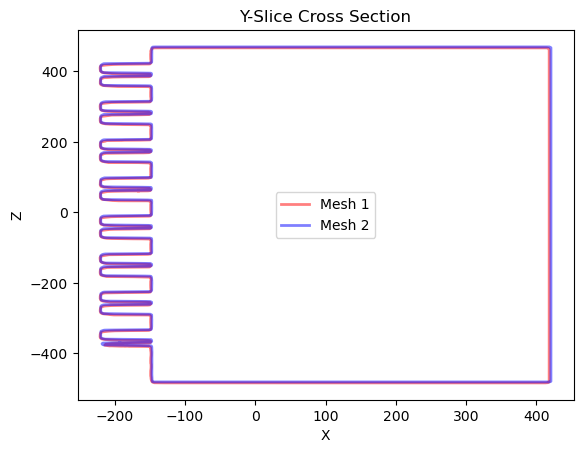

Shape Context Distance: 0.10203598439693451


In [ ]:
ran = np.linspace(-330, 400, 10)
for i in ran:
	main(file1, file2, y_slice_value=i)